<a href="https://colab.research.google.com/github/deepanshukanchan/Seoul-bike-prediction/blob/main/Seoulbikerent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the main libraries
import pandas as pd  # for data cleaning and analysing
import matplotlib as mpl  # library used for data visualization and graphical plotting
import matplotlib.pyplot as plt  #  used to create numerous and diverse plot types
import numpy as np  # it is a python library used to work with arrays
import seaborn as sns  # for data visualization and exploratory data analysis
from scipy import stats  #  for solving scientific and mathematical problems

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path ='/content/drive/MyDrive/seoulbikerent/SeoulBikeData.csv'
df_main=pd.read_csv(file_path , encoding= 'unicode_escape')

In [4]:
df_main = pd.read_csv(file_path , encoding= 'unicode_escape')
df_main

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

# Data cleaning

In [5]:
df_main.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
df_main.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [7]:
df_main.shape

(8760, 14)

In [8]:
df_main.info


<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

In [9]:
df_main.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
df_main.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [11]:
# Ranaming the columns
df_main.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [12]:
#Extract month,date,year
df_main['Date']=df_main['Date'].astype('datetime64[ns]')
     

In [13]:
#Creating new column for month,date,year
df_main['Month']=df_main['Date'].dt.month

df_main['Day']=df_main['Date'].dt.day_name()                 


In [14]:
# encong 1 if weekend and 0 if weekdays
df_main['Weekdays_or_weekend']=df_main['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
     

In [15]:
df_main.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Month       Day  Weekdays_or_weekend  
0  Winter  No Holiday             Yes      1  Thursday                    0  
1  Winter  No Holiday             Yes      1  Thursday                    0  
2  Winter  No Holiday             Yes      1  Thursday                    0  
3  Winter  No Holiday             Yes      1  Thursday                    0  
4  Winter  No Holiday             Yes      1  Thursday                    0

In [16]:
# Croping date and day column
df_main.drop(['Date',"Day"],axis=1 ,inplace=True)

In [17]:
# Checking null values
df_main.isnull()

Rented_Bike_Count   Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                 False  False        False     False       False       False   
1                 False  False        False     False       False       False   
2                 False  False        False     False       False       False   
3                 False  False        False     False       False       False   
4                 False  False        False     False       False       False   
...                 ...    ...          ...       ...         ...         ...   
8755              False  False        False     False       False       False   
8756              False  False        False     False       False       False   
8757              False  False        False     False       False       False   
8758              False  False        False     False       False       False   
8759              False  False        False     False       False       False   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  Seasons  \
0                     False            False     False     False    False   
1                     False            False     False     False    False   
2                     False            False     False     False    False   
3                     False            False     False     False    False   
4                     False            False     False     False    False   
...                     ...              ...       ...       ...      ...   
8755                  False            False     False     False    False   
8756                  False            False     False     False    False   
8757                  False            False     False     False    False   
8758                  False            False     False     False    False   
8759                  False            False     False     False    False   

      Holiday  Functioning_Day  Month  Weekdays_or_weekend  
0       False            False  False                False  
1       False            False  False                False  
2       False            False  False                False  
3       False            False  False                False  
4       False            False  False                False  
...       ...              ...    ...                  ...  
8755    False            False  False                False  
8756    False            False  False                False  
8757    False            False  False                False  
8758    False            False  False                False  
8759    False            False  False                False  

[8760 rows x 15 columns]

In [18]:
#checking null and missing values
df_main.isnull().sum().sum()

0

In [19]:
## Checking different catagories counts for Seasons categories.
df_main['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [20]:
## Checking different catagories counts for Holiday categories.
df_main['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [21]:

df_main['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [22]:
df_main['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [23]:
df_main['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [24]:
#Statistical Information
df_main.describe().T.style.background_gradient() 

Text(0.5, 1.0, ' Visualising Missing Values')

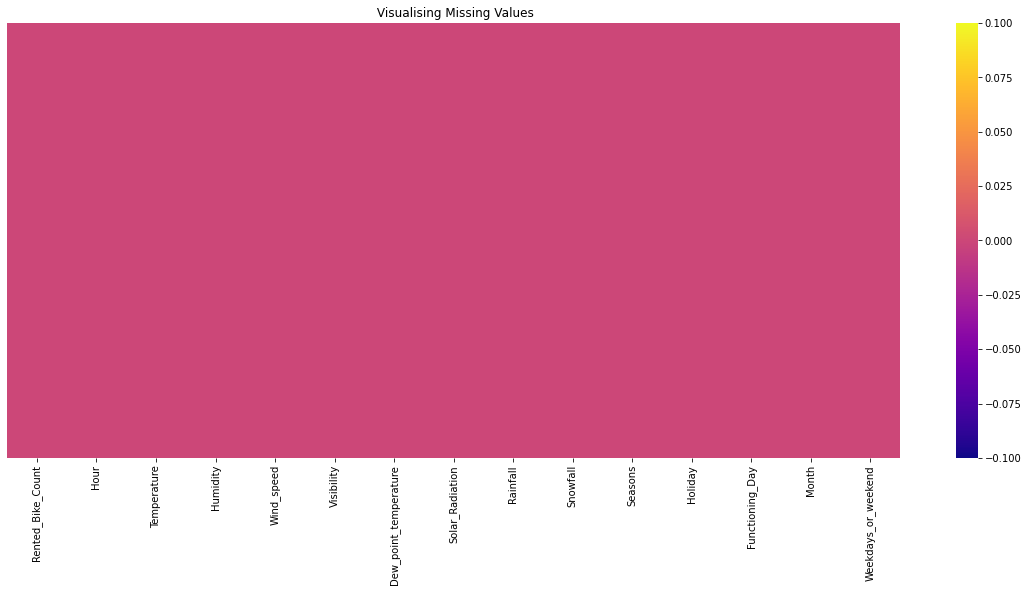

In [25]:
# Visualization of null and missing values in heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df_main.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

no null value found in the data

In [26]:
## Checking Duplicate rows in our Dataset.
duplicates=df_main.duplicated().sum()
print(f"We are having {duplicates} rows in our Dataframe.")
     

We are having 0 rows in our Dataframe.


**Exploratory Analysis and Visualization**

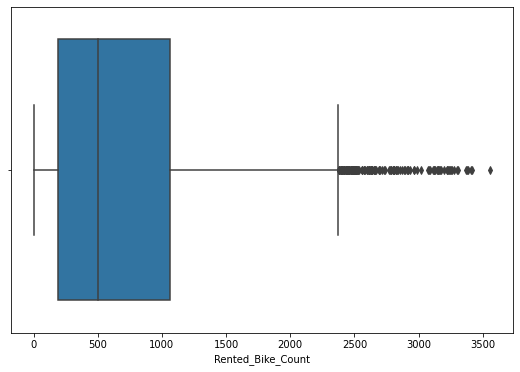

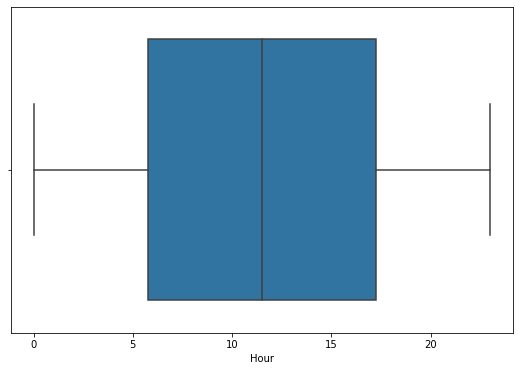

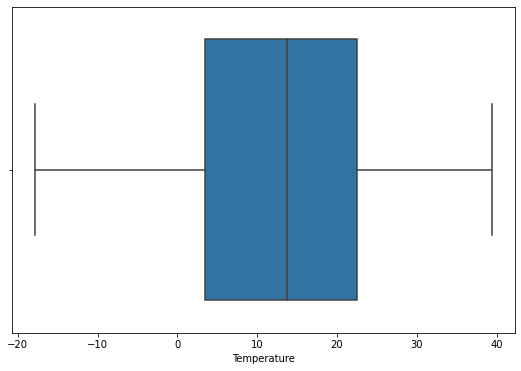

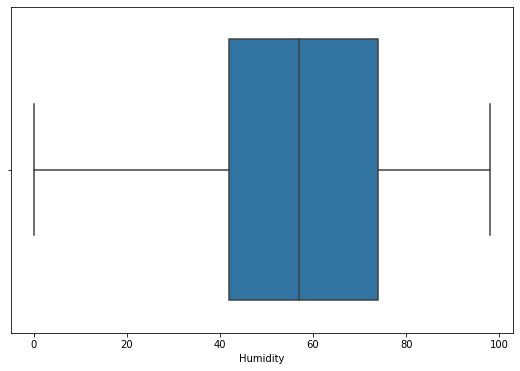

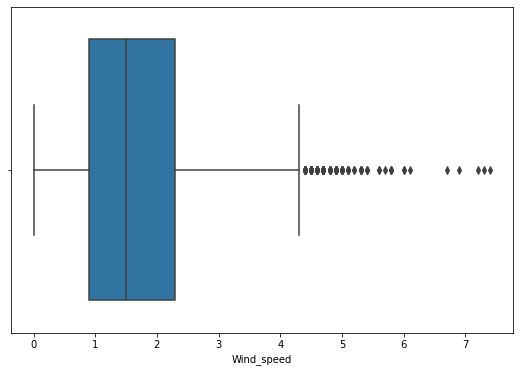

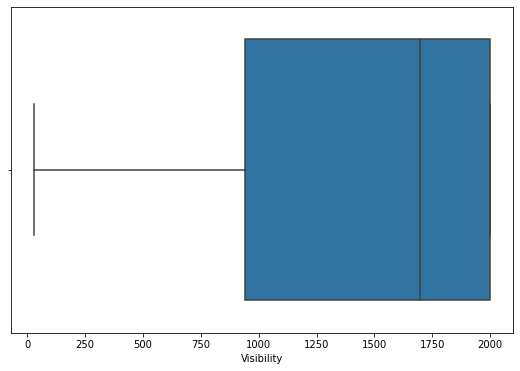

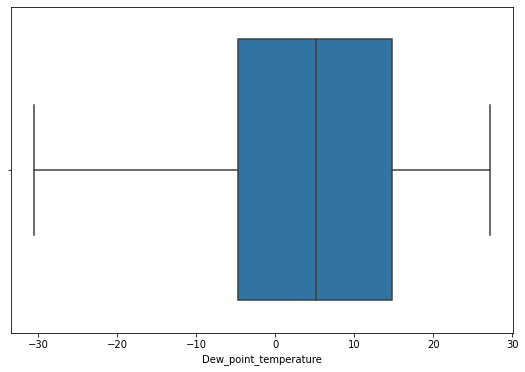

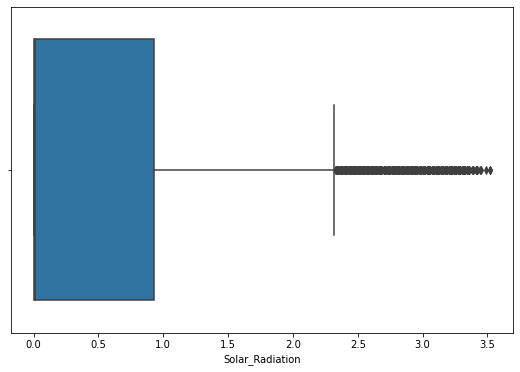

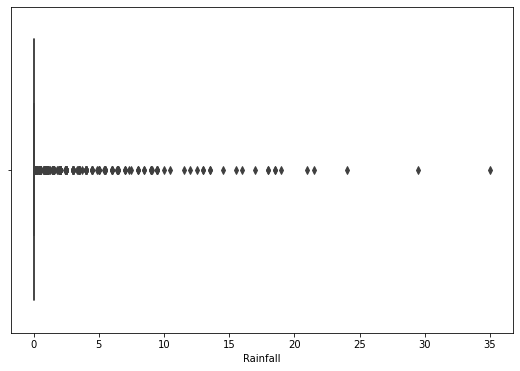

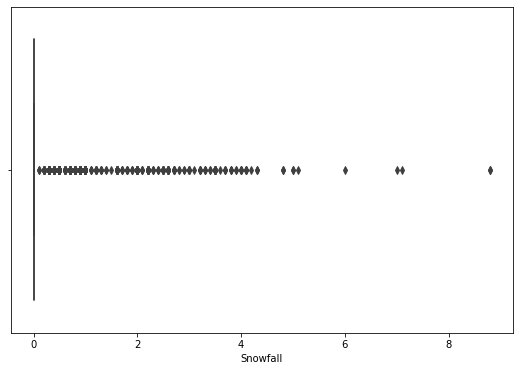

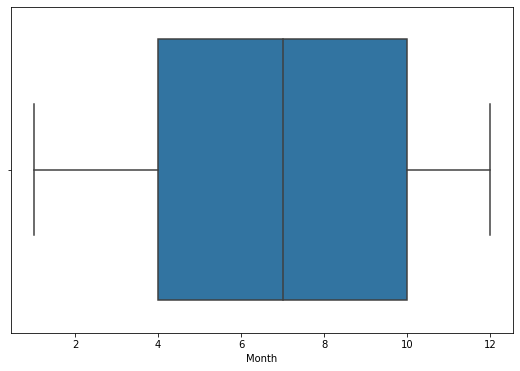

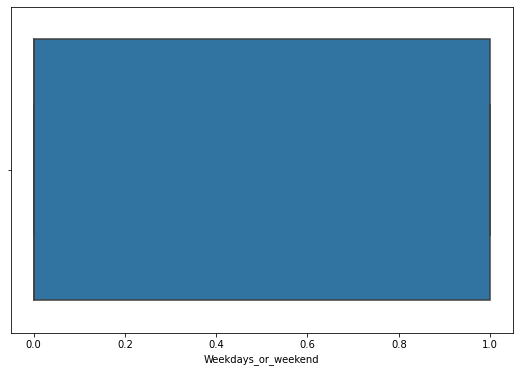

In [27]:
## Createing numeric columns list.
numeric_col=df_main.describe().columns.tolist()
numeric_col

## Create categorical column list
categorical_columns= list(set(df_main.columns) - set(df_main.describe().columns))
categorical_columns

## Priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=df_main[col])

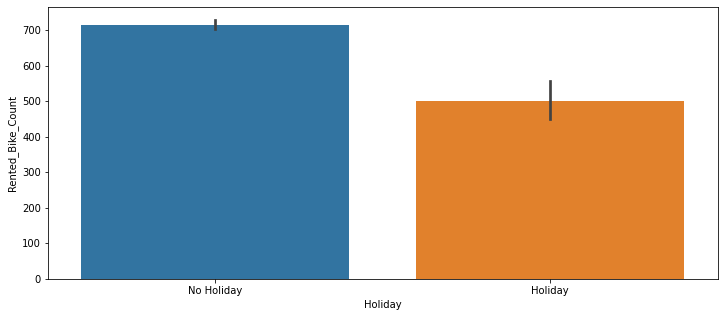

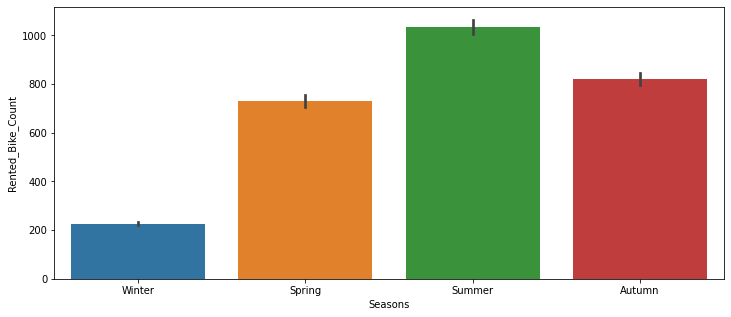

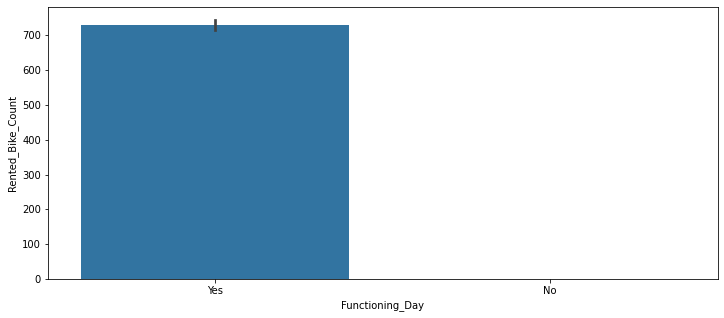

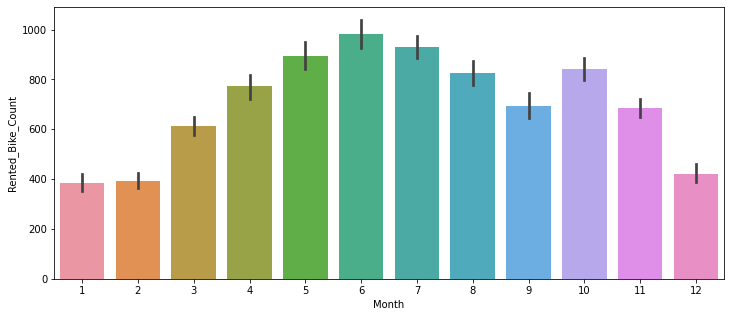

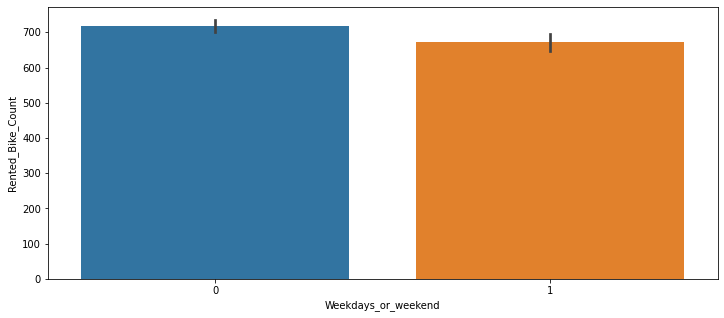

In [28]:
# Adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])
 
## Creating barchart for each categorical columns with respect to target(dependent variable) variable to insights.
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=df_main[col],y=df_main['Rented_Bike_Count'])

Observations :
1) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

2) High number of bikes were rented on No Holidays.

3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

4) Most of the bikes were rented on Weekdays compared to weekends.

From March Bike Rent Count started increasing and it was highest in June.



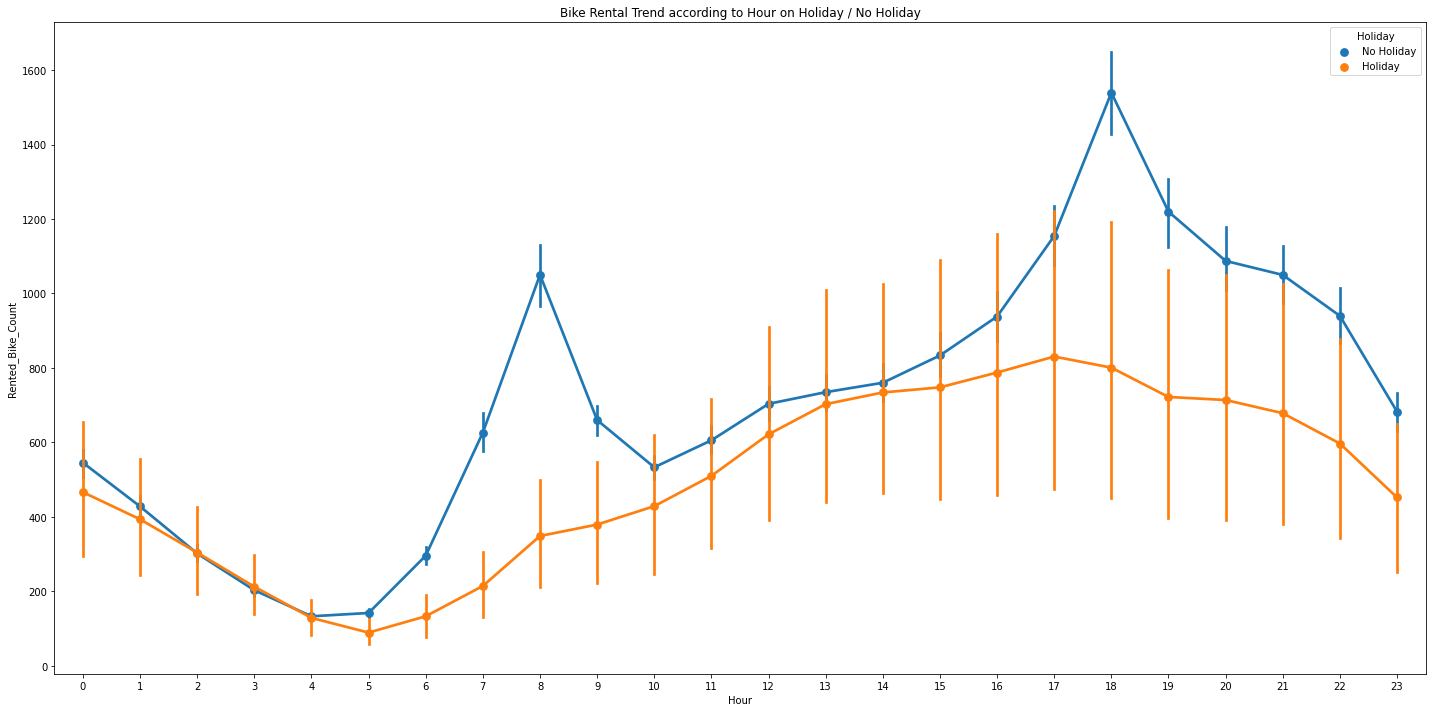

In [29]:
##  Checking bike rent count trend with respect to Hour on Functioning days, weekends or weekdays,seasons,Holidays columns
plt.figure(figsize=(20,10))
sns.pointplot(x=df_main['Hour'],y=df_main['Rented_Bike_Count'],hue=df_main['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")
plt.tight_layout()

Observation
1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday).

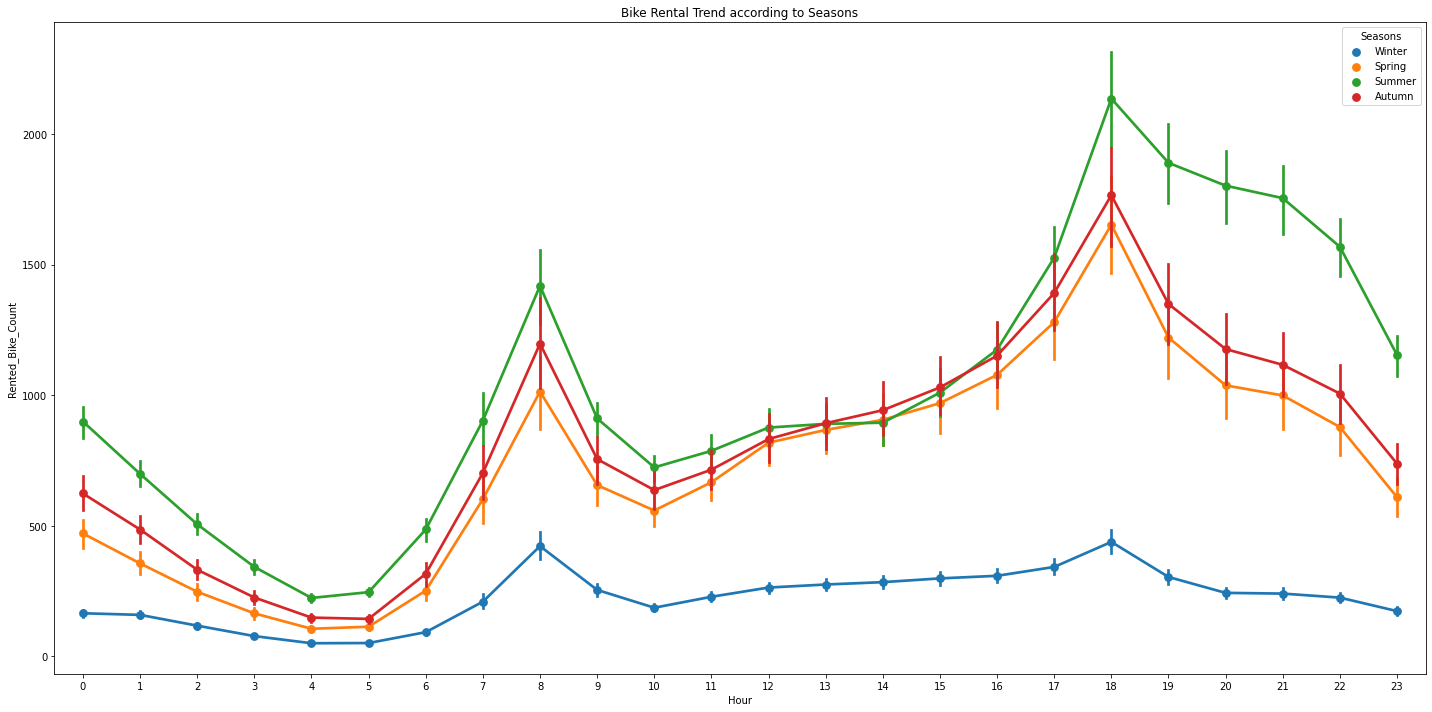

In [30]:
## Checking bike rent trend with respect to Seasons.

plt.figure(figsize=(20,10))
sns.pointplot(x=df_main['Hour'],y=df_main['Rented_Bike_Count'],hue=df_main['Seasons'], marker="x",markeredgecolor="black")
plt.title("Bike Rental Trend according to Seasons")
plt.tight_layout()
     

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

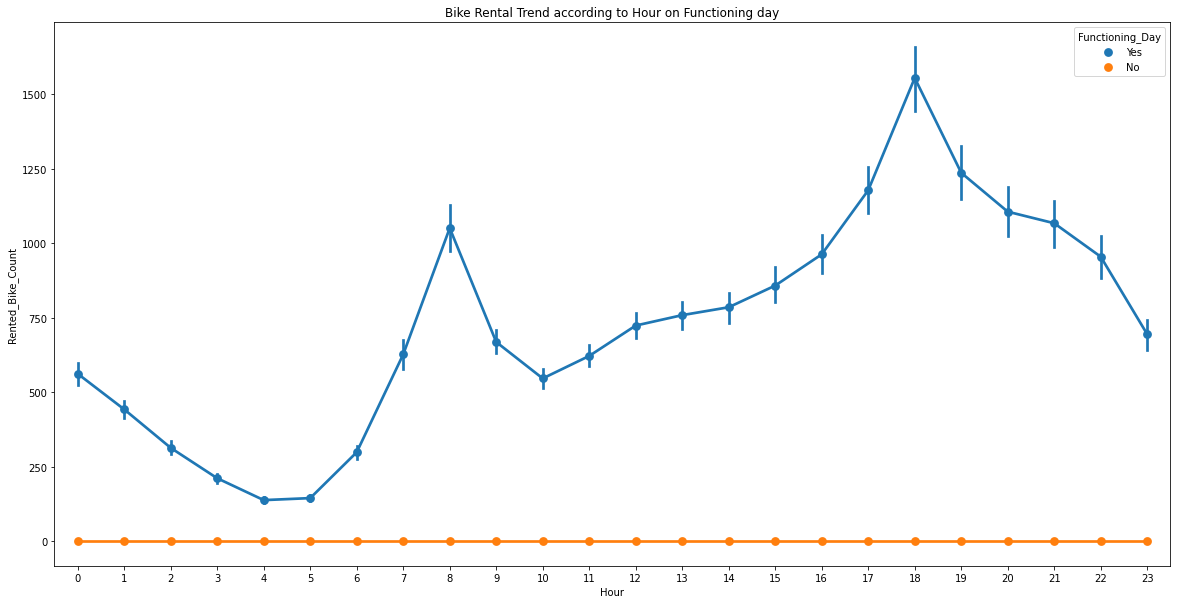

In [31]:
## Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x=df_main['Hour'],y=df_main['Rented_Bike_Count'],hue=df_main['Functioning_Day'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

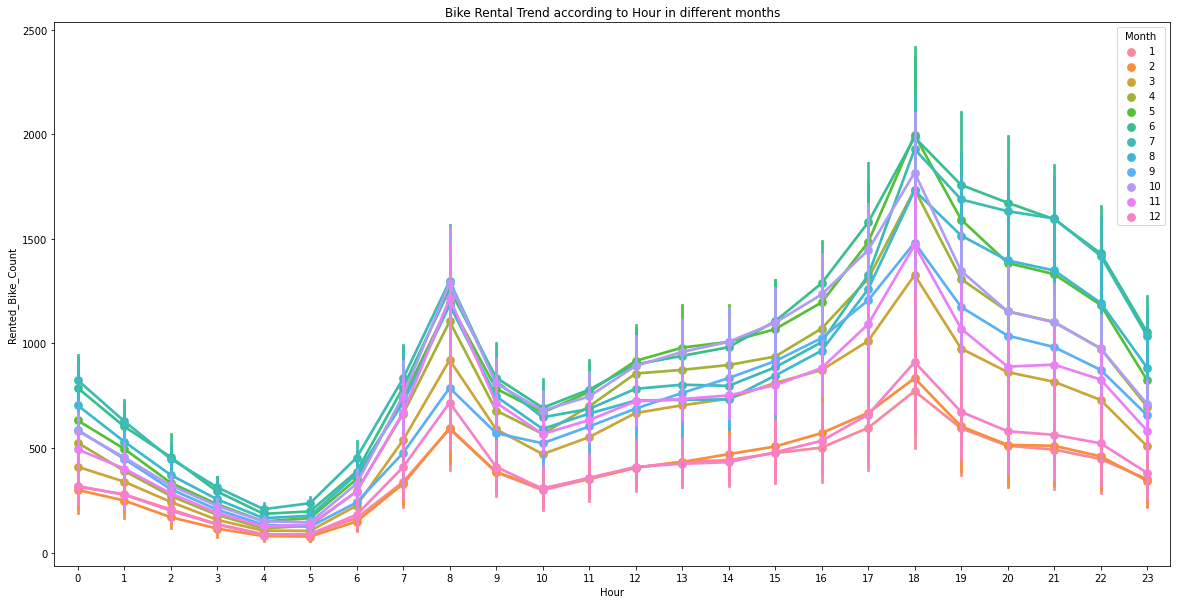

In [32]:
## Bike Rent Count trend with respect Hours on Months
plt.figure(figsize=(20,10))
sns.pointplot(x=df_main['Hour'],y=df_main['Rented_Bike_Count'],hue=df_main['Month'])
plt.title("Bike Rental Trend according to Hour in different months")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

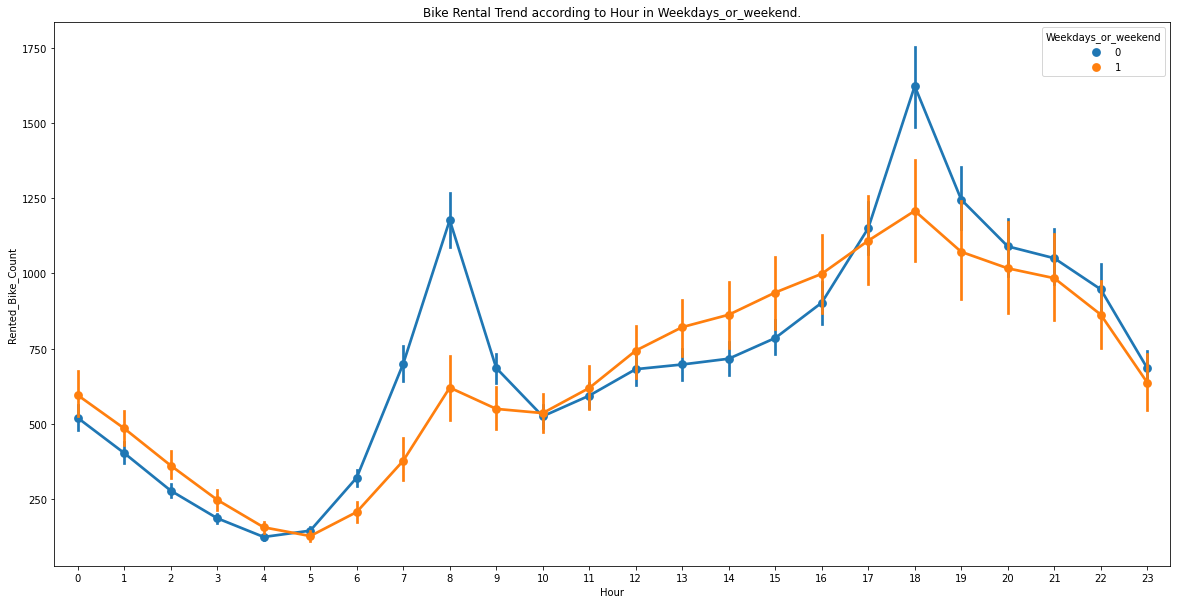

In [33]:
# Bike Rent Count trend with respect Hours on Weekdays or weekends
plt.figure(figsize=(20,10))
sns.pointplot(x=df_main['Hour'],y=df_main['Rented_Bike_Count'],hue=df_main['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend

## **Checking Distribution of target(dependent) variable: "Bike Rented Count**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


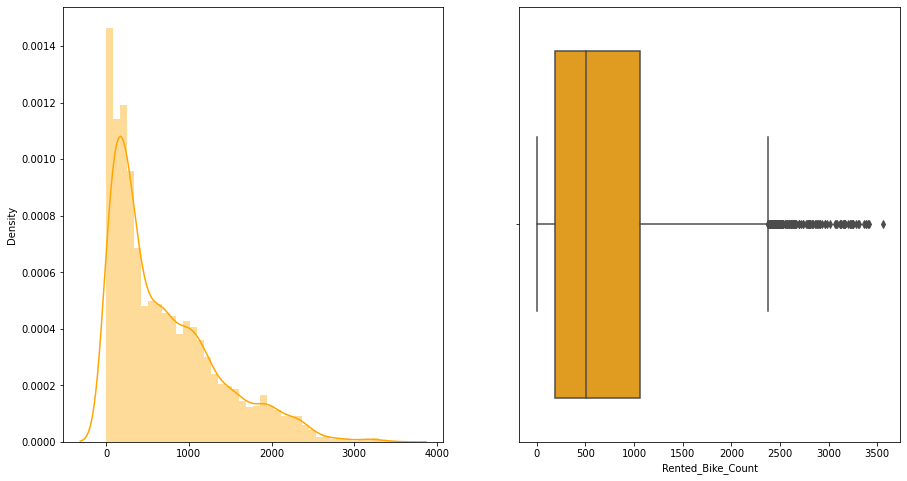

In [34]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df_main['Rented_Bike_Count'],color='orange',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=df_main['Rented_Bike_Count'],color='orange',ax=axes[1])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


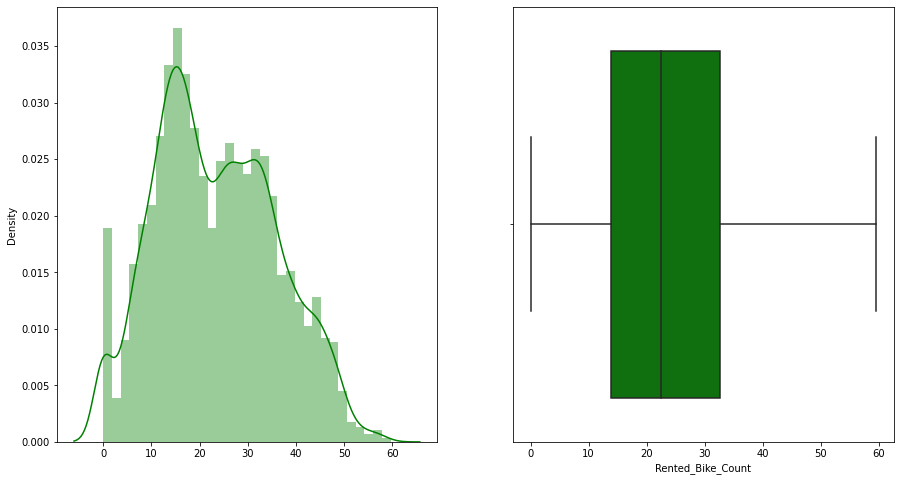

In [35]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df_main['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df_main['Rented_Bike_Count']),color='g',ax=axes[1])

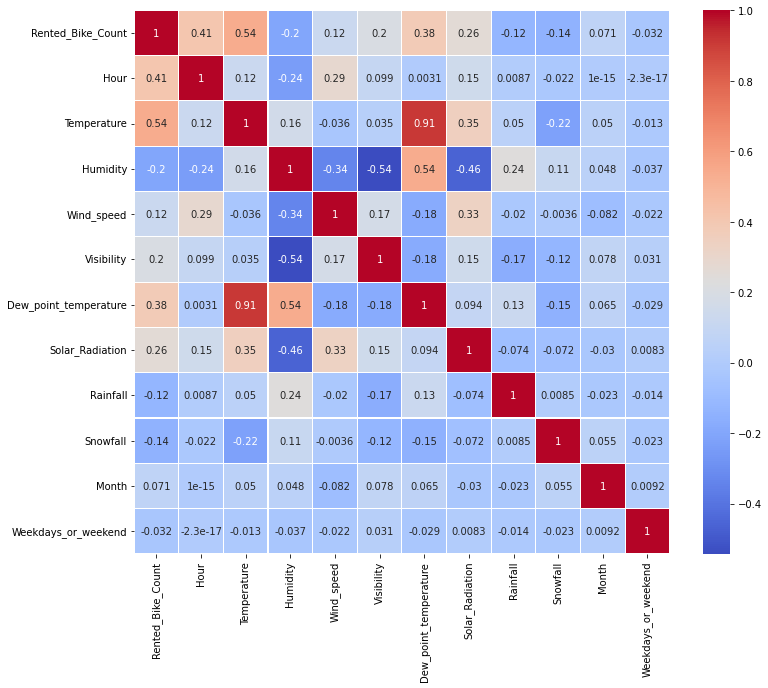

In [36]:
#Let's checking correlation between target(dependent) variable and independent variable

#.corr() use to find correlation with data
data_corr= df_main.corr()       
plt.figure(figsize=(12,10))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells, 
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [37]:
# make copy of dataset
df=df_main.copy()

In [38]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
df.drop('Dew_point_temperature',inplace=True,axis=1)

In [39]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

variables       VIF
0                 Hour  3.961874
1          Temperature  3.236809
2             Humidity  6.114153
3           Wind_speed  4.616621
4           Visibility  5.404128
5      Solar_Radiation  2.272068
6             Rainfall  1.081252
7             Snowfall  1.125304
8                Month  4.580307
9  Weekdays_or_weekend  1.399708

Humidity VIF is greater than 5 so we will remove that column.

In [41]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])


variables       VIF
0                 Hour  3.931193
1          Temperature  2.543847
2           Wind_speed  4.301342
3           Visibility  5.330632
4      Solar_Radiation  1.894468
5             Rainfall  1.045135
6             Snowfall  1.081123
7                Month  3.741610
8  Weekdays_or_weekend  1.375146

In [42]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables       VIF
0                 Hour  3.755736
1          Temperature  2.492225
2           Wind_speed  3.748534
3      Solar_Radiation  1.893823
4             Rainfall  1.030569
5             Snowfall  1.077566
6                Month  3.049391
7  Weekdays_or_weekend  1.350943

Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this columns from our dataset

In [43]:
# As per above vif calculation dropping humidity and visibility columns.
df.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [44]:
# checking categoiries in season column.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [45]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [46]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [47]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [48]:
# Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [49]:
# checking dummy and labled columns
df.head(3)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   

   Rainfall  Snowfall  Holiday  Functioning_Day  Month  Weekdays_or_weekend  \
0       0.0       0.0        0                1      1                    0   
1       0.0       0.0        0                1      1                    0   
2       0.0       0.0        0                1      1                    0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1

In [50]:
# final info before going for modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Wind_speed           8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning_Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  Seasons_Spring       8760 non-null   uint8  
 12  Seasons_Summer       8760 non-null   uint8  
 13  Seasons_Winter       8760 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 778.6 KB


Linear Regression

In [51]:

# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [52]:

# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(df['Rented_Bike_Count'])

In [53]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [54]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [55]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
     

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [56]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [57]:

# Cheeck coefficents
l_reg.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [58]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

Coefficient
Hour                   13.034125
Temperature            24.395632
Wind_speed              3.358253
Solar_Radiation         3.435103
Rainfall              -71.139711
Snowfall              -10.476341
Holiday                -3.005512
Functioning_Day        28.479819
Month                   1.055219
Weekdays_or_weekend    -0.589300
Seasons_Spring         -2.932628
Seasons_Summer         -3.582237
Seasons_Winter         -6.458862

In [59]:

# Check intercept
l_reg.intercept_

-21.47705344024816

In [60]:
#Checking score
l_reg.score(X_train,y_train)

0.6123528085603556

In [61]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [62]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.


In [63]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [64]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8555  60.2995  7.7653    0.6124

In [65]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 5.834169822951748.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.


In [66]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [67]:

# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8342  58.6242  7.6566    0.6183

In [68]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [69]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [70]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")

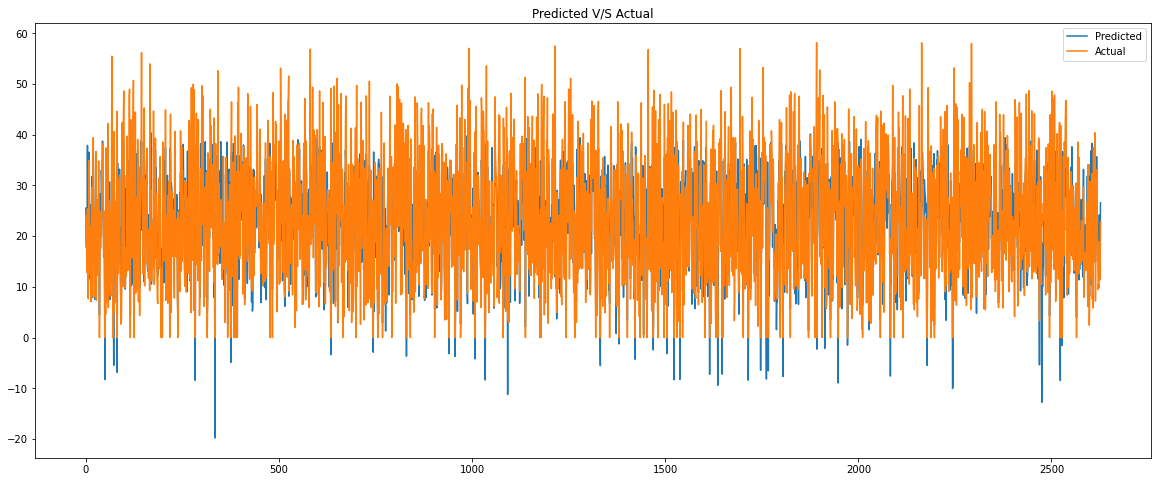

In [71]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

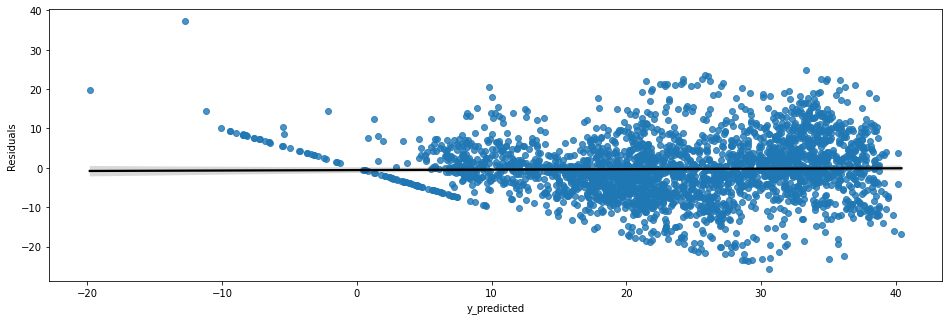

In [72]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

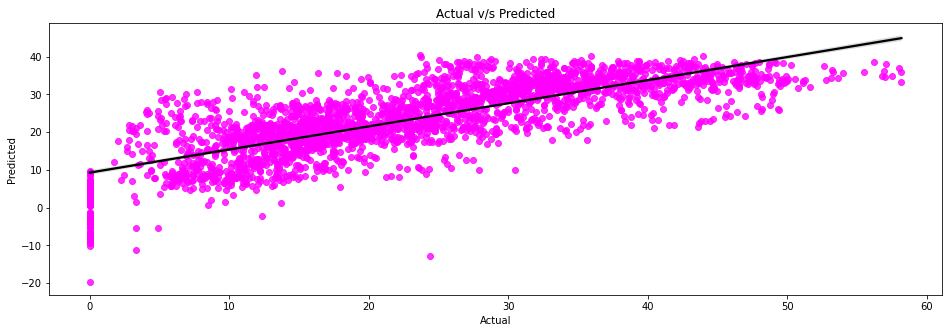

In [73]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


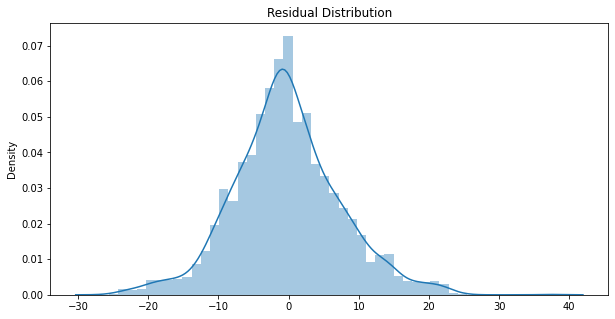

In [74]:
Residual_distPlot(y_pred,y_test)

**Lasso** This method is usually used in machine learning for the selection of the subset of variables.

In [76]:
# instantiating
lasso_reg=Lasso(alpha=0.01)

In [77]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [78]:
# Check coefficient
lasso_reg.coef_

array([ 13.06618706,  23.53689635,   2.7511264 ,   3.64259929,
       -61.65707559,  -6.14969513,  -2.72395881,  27.99198566,
         0.97614536,  -0.51631491,  -2.73325777,  -3.18707888,
        -6.55141403])

In [79]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})


X  Coeficients
0                  Hour    13.066187
1           Temperature    23.536896
2            Wind_speed     2.751126
3       Solar_Radiation     3.642599
4              Rainfall   -61.657076
5              Snowfall    -6.149695
6               Holiday    -2.723959
7       Functioning_Day    27.991986
8                 Month     0.976145
9   Weekdays_or_weekend    -0.516315
10       Seasons_Spring    -2.733258
11       Seasons_Summer    -3.187079
12       Seasons_Winter    -6.551414

In [80]:
# Check score on train dataset
lasso_reg.score(X_train,y_train)

0.6112950857219155

In [81]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

0.61723035952942

In [82]:
# Check intercept
lasso_reg.intercept_

-20.65131177706763

In [83]:
# y prdiction on train data
y_pred_train=lasso_reg.predict(X_train)
# y prdiction on test data
y_pred=lasso_reg.predict(X_test)
     

*Evaluation On Train Data.*

In [84]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [85]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [86]:
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8555  60.2995  7.7653    0.6124
1              Lasoo  5.8691  60.4640  7.7759    0.6113

**Evaluation On Test Data.**

In [87]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [88]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [89]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8342  58.6242  7.6566    0.6183
1              Lasso  5.8506  58.7927  7.6676    0.6172

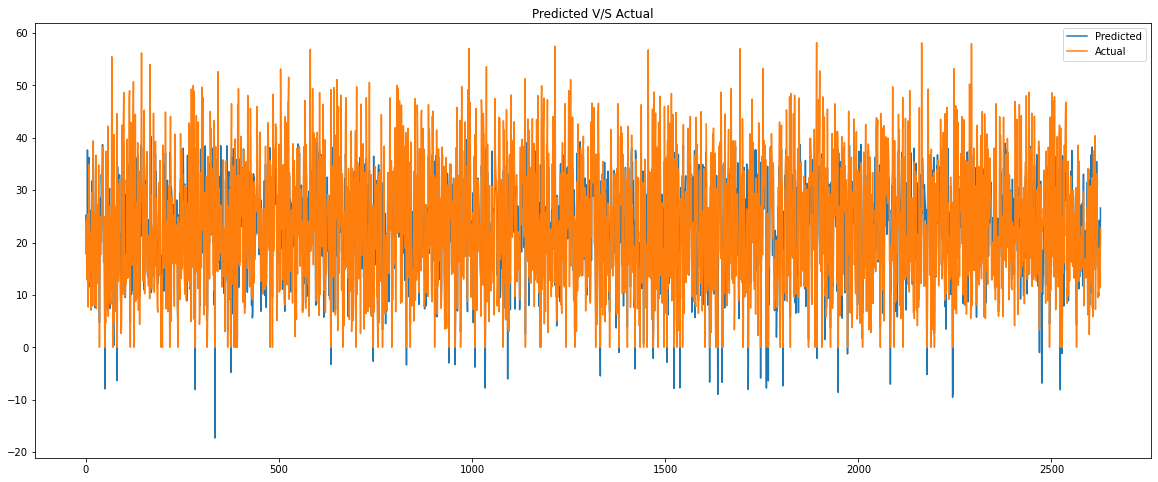

In [90]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

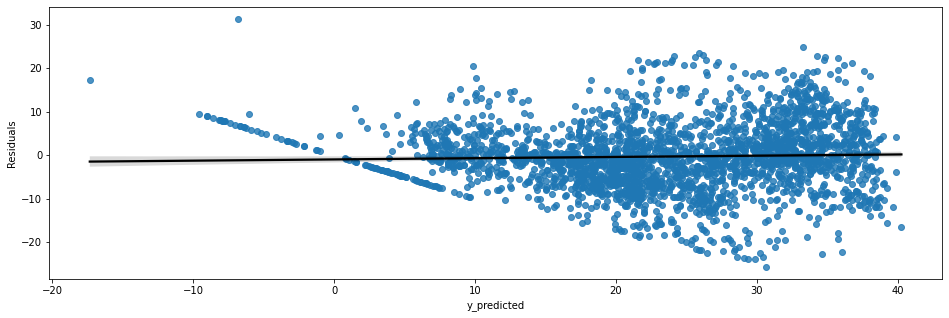

In [91]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

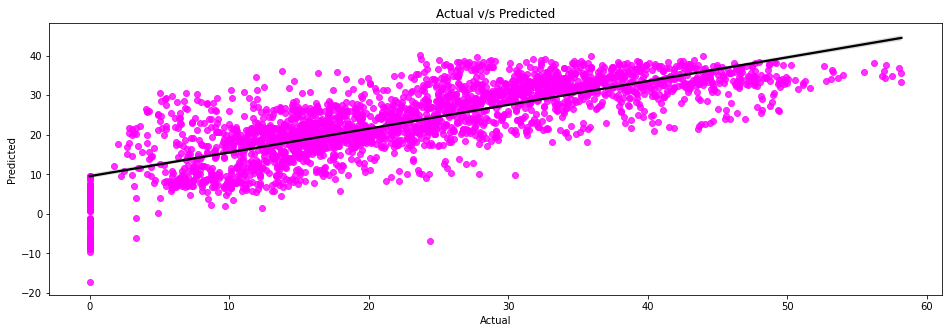

In [92]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


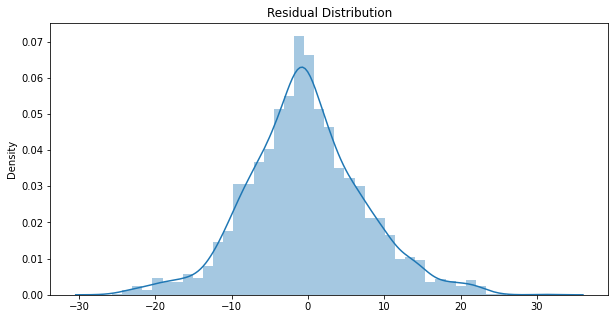

In [93]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

***Ridge***

In [94]:
# instantiating
ridge_lg=Ridge(alpha=0.1)
# fitting and training
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [95]:
# check coefficient
ridge_lg.coef_

array([ 13.03371786,  24.34582856,   3.34949793,   3.4576116 ,
       -70.04499364, -10.41205151,  -3.00303898,  28.46135581,
         1.05691503,  -0.58736967,  -2.9327985 ,  -3.57190574,
        -6.46665547])

In [96]:
# get dataframe for x columns and coeff
pd.DataFrame(ridge_lg.coef_,X.columns,columns=['Coefficients'])

Coefficients
Hour                    13.033718
Temperature             24.345829
Wind_speed               3.349498
Solar_Radiation          3.457612
Rainfall               -70.044994
Snowfall               -10.412052
Holiday                 -3.003039
Functioning_Day         28.461356
Month                    1.056915
Weekdays_or_weekend     -0.587370
Seasons_Spring          -2.932799
Seasons_Summer          -3.571906
Seasons_Winter          -6.466655

In [97]:
# Check intercept
ridge_lg.intercept_

-21.44118629409719

**Evaluation On Train Data.** 

In [98]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [99]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [100]:

traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0   Linear Regression  5.8555  60.2995  7.7653    0.6124
1               Lasoo  5.8691  60.4640  7.7759    0.6113
2  Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113

**Evaluation On Test Data.**

In [101]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [102]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [103]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0           Linear Regression  5.8342  58.6242  7.6566    0.6183
1                       Lasso  5.8506  58.7927  7.6676    0.6172
2  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172

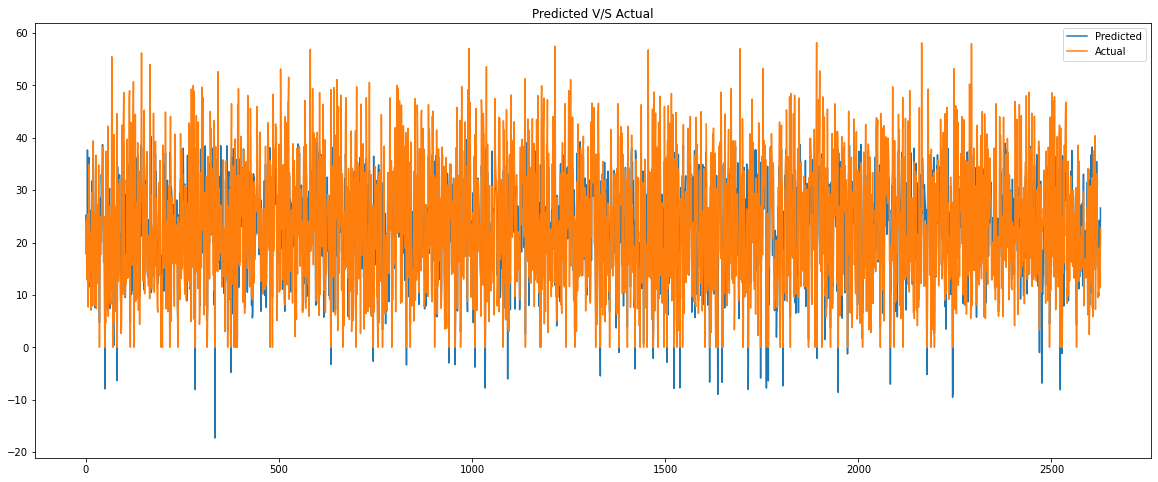

In [104]:
plot_Pred_vs_actual(y_pred,y_test)
     

Text(0.5, 0, 'y_predicted')

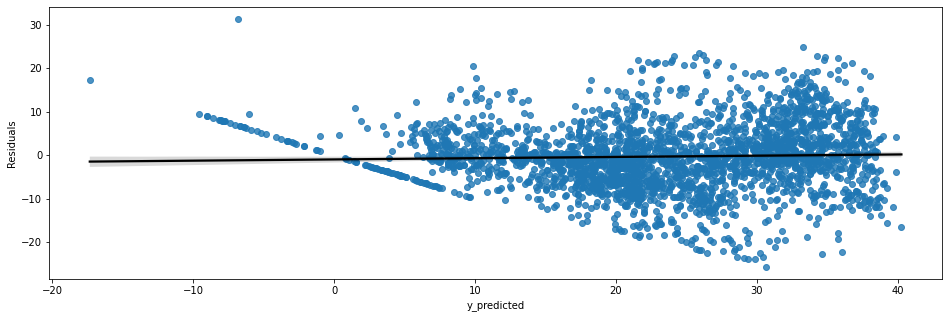

In [105]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')
     

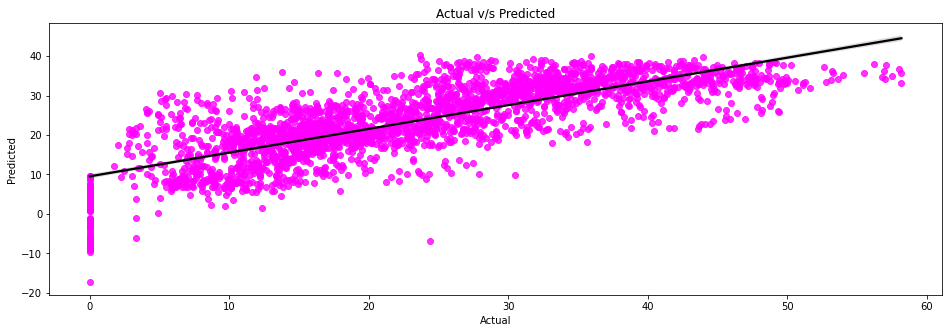

In [106]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


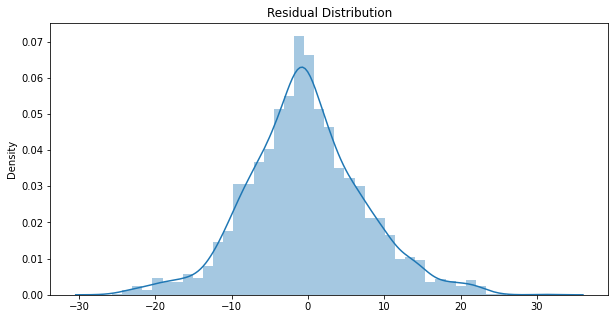

In [107]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

**GreadSearchCV on Ridge**

In [108]:
# importing gridsearchcv for hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

In [109]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [110]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -60.73715246759981


**ElasticNet**

In [111]:
# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [112]:
# Check score on train data
elastic_net_reg.score(X_train,y_train)

0.6084747377362095

In [113]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.6139867979293316

In [114]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)

In [115]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8932275545714745.
The Mean Squred Error(MSE) is 60.90273656811195.
The Root Mean Squared Error(RMSE) is 7.804020538678249.
The R2 Score is 0.6084747377362095.


In [116]:
train_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [117]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8555  60.2995  7.7653    0.6124
1                            Lasoo  5.8691  60.4640  7.7759    0.6113
2               Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085

In [118]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.871068266349744.
 The Mean Squred Error(MSE) is 59.2908889405223.
The Root Mean Squared Error(RMSE) is 7.700057723194178.
The R2 Score is 0.6139867979293316.


In [119]:
test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [120]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8342  58.6242  7.6566    0.6183
1                            Lasso  5.8506  58.7927  7.6676    0.6172
2       Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3  ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140

In [121]:
# Cross validation

elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.624e+02, tolerance: 7.283e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.962e+04, tolerance: 7.060e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.044e+04, tolerance: 7.151e+01

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [122]:
# print best parameters and best score
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.0001, 'l1_ratio': 0.5}
The best negative mean squred error value is -60.73201342564849


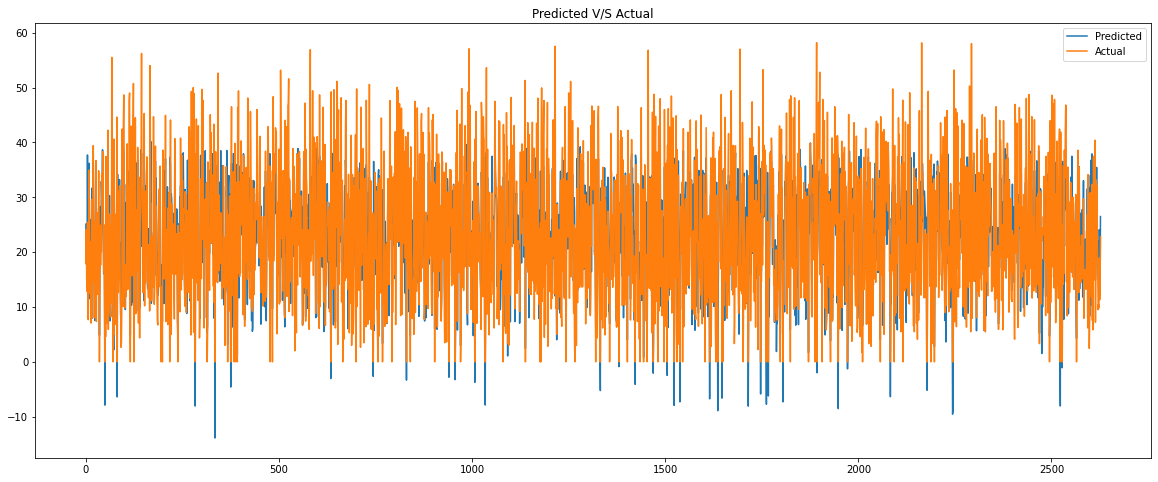

In [123]:
# plotting predicted v/s actual
plot_Pred_vs_actual(y_pred,y_test)
     

Text(0.5, 0, 'y_predicted')

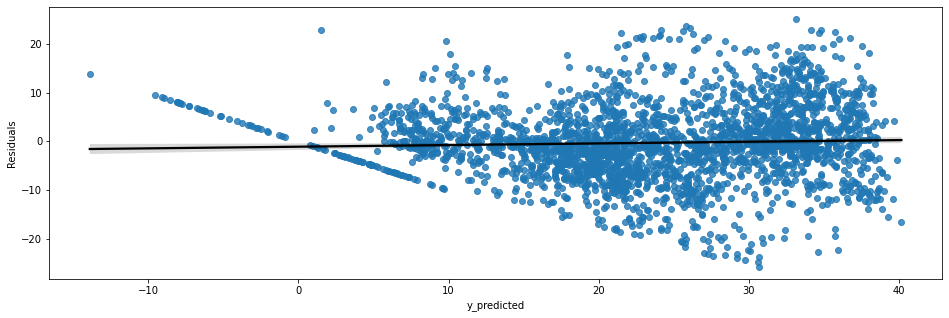

In [124]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

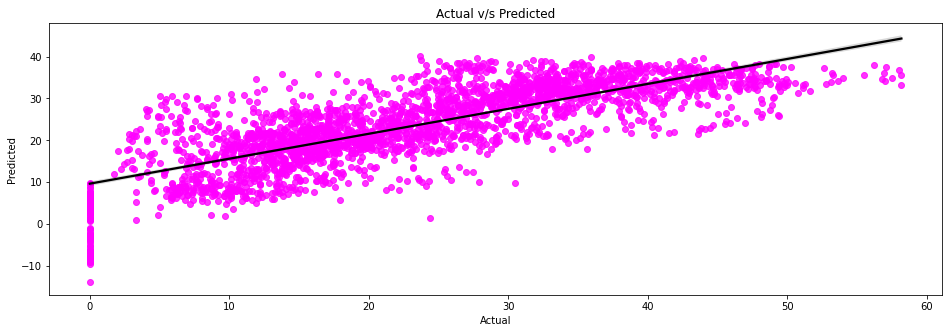

In [125]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


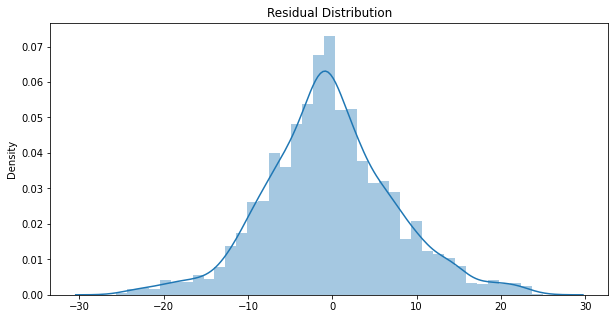

In [126]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

As We have saw in linear regression,lasso,ridge and elastic net we are getting almost similar r2 scores.

**Decision Tree Regressor**

In [127]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [128]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8814250872495163

In [129]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.8374788631985037

In [130]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)

In [131]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.8855165215690697.
The Mean Squred Error(MSE) is 18.44462508772692.
The Root Mean Squared Error(RMSE) is 4.294720606480347.
The R2 Score is 0.8814250872495163.


In [132]:
# creating dictionary  of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regressor-GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [133]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814

In [134]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.401135009426975.
 The Mean Squred Error(MSE) is 24.962935518513312.
The Root Mean Squared Error(RMSE) is 4.996292177056233.
The R2 Score is 0.8374788631985037.


In [135]:
test_dict={'Model':"Decision Tree Regressor(GridsearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [136]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4011  24.9629  4.9963    0.8375

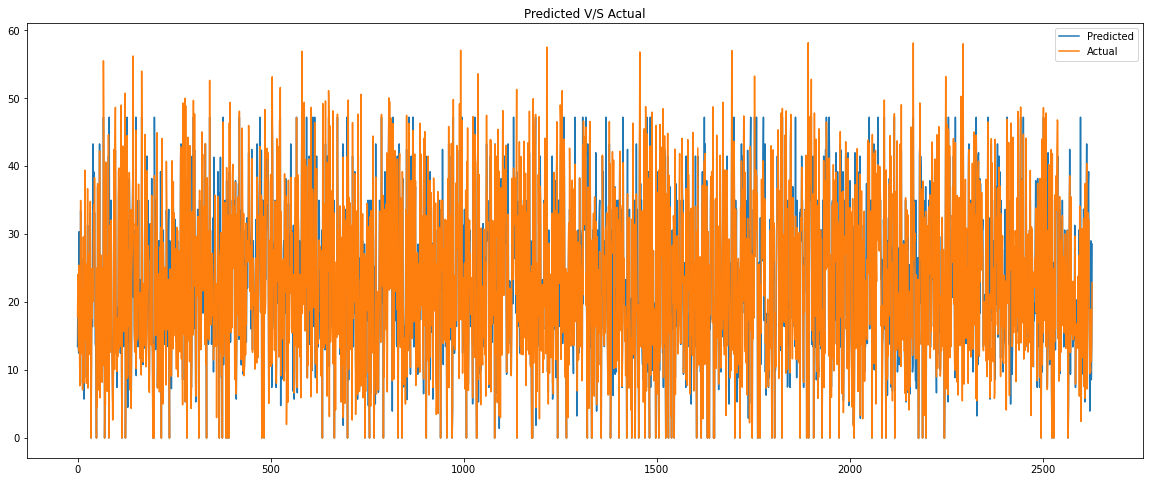

In [137]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

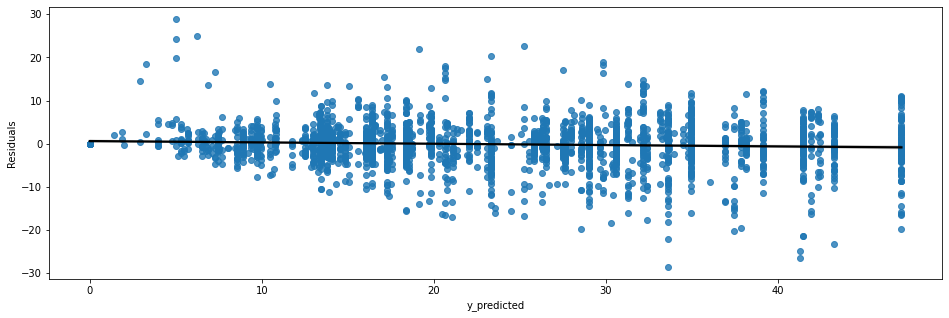

In [138]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

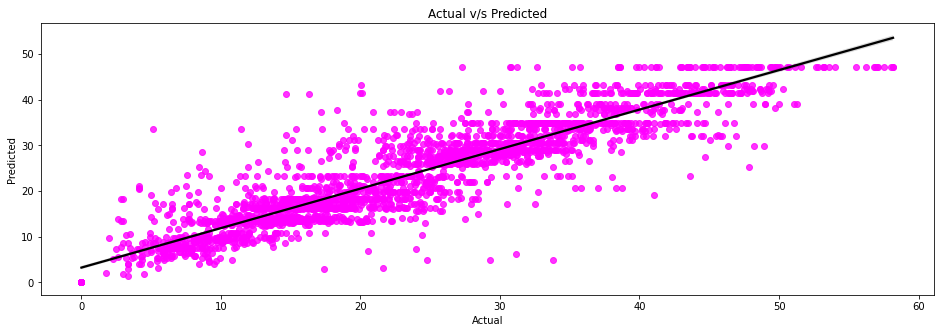

In [139]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


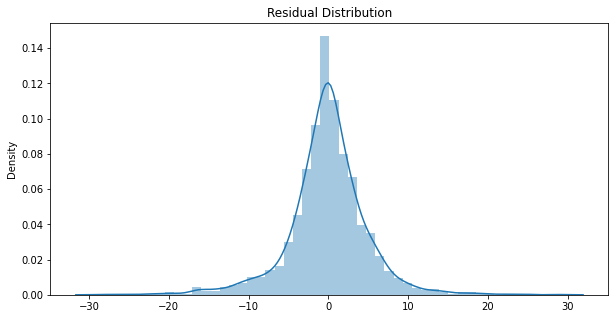

In [140]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)
     

**Hyperparameter Tuning**

In [141]:
# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [142]:
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarni

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae'], 'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [143]:
tuning_model.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [144]:
D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

Text(0.5, 0, 'Relative Importance')

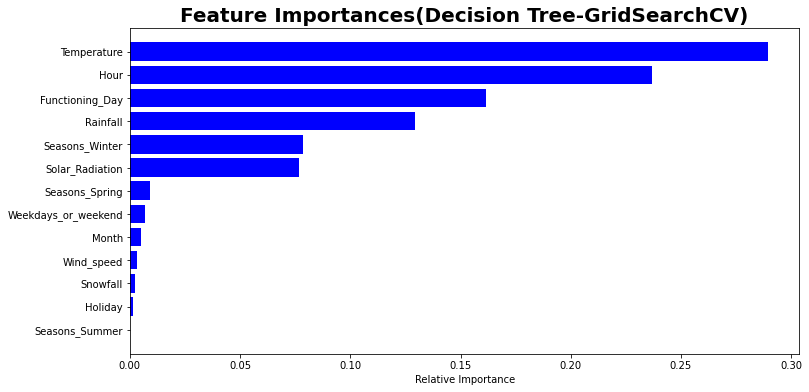

In [145]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)',fontweight="bold",fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')


We have applied this best parametrs to above Decsion tree regressor model

**Random Forest Regressor**

In [146]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [147]:
rf.score(X_train,y_train)

0.9859797485160076

In [148]:
rf.score(X_test,y_test)

0.9072329939188795

In [149]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)
     

In [150]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.9406802179905949.
The Mean Squred Error(MSE) is 2.1808852839053303.
The Root Mean Squared Error(RMSE) is 1.4767820705525003.
The R2 Score is 0.9859797485160076.


In [151]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9407   2.1809  1.4768    0.9860

In [152]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.4884204513510917.
 The Mean Squred Error(MSE) is 14.248834561605314.
The Root Mean Squared Error(RMSE) is 3.7747628483926396.
The R2 Score is 0.9072329939188795.


In [153]:
test_dict={'Model':"Radom forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4011  24.9629  4.9963    0.8375
5                           Radom forest  2.4884  14.2488  3.7748    0.9072

**GridSearchCV On random Forest**

In [154]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [155]:
rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [156]:
rf_tuning.best_params_

{'max_depth': 9, 'n_estimators': 80}

In [157]:
rf=RandomForestRegressor(max_depth=9,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=9)

In [158]:
rf.score(X_train,y_train)

0.9038531247733343

In [159]:
rf.score(X_test,y_test)
     

0.8777878983569748

In [160]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)
     

In [161]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.6342156260909784.
The Mean Squred Error(MSE) is 14.955887596932445.
The Root Mean Squared Error(RMSE) is 3.8672842663725207.
The R2 Score is 0.9038531247733343.


In [162]:
train_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df
     

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9407   2.1809  1.4768    0.9860
6            Random Forest-GridSearchCv  2.6342  14.9559  3.8673    0.9039

In [163]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.961749079236342.
 The Mean Squred Error(MSE) is 18.771544876793815.
The Root Mean Squared Error(RMSE) is 4.3326140927612995.
The R2 Score is 0.8777878983569748.


In [164]:

test_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4011  24.9629  4.9963    0.8375
5                           Radom forest  2.4884  14.2488  3.7748    0.9072
6             Random Forest-GridSearchCv  2.9617  18.7715  4.3326    0.8778

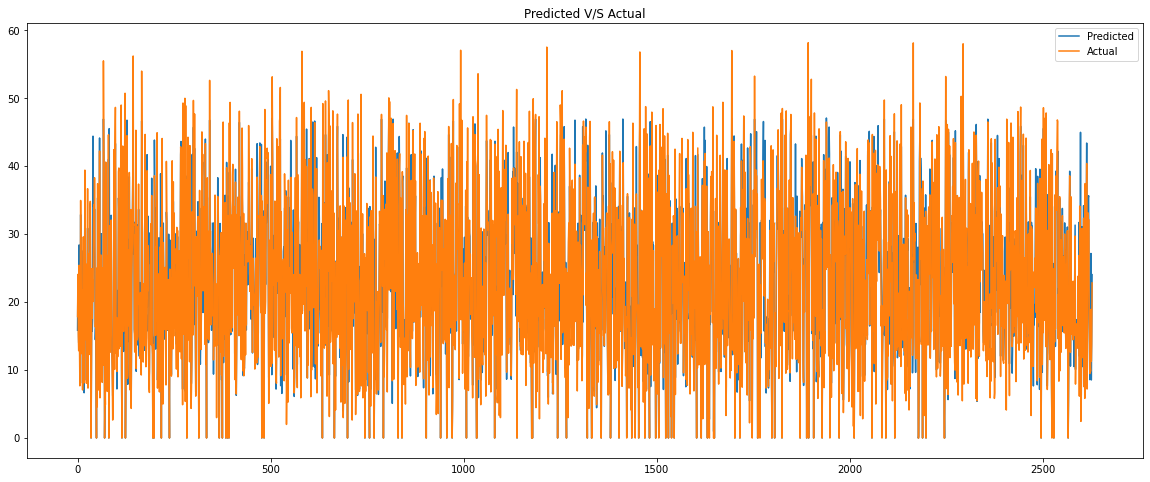

In [165]:

plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

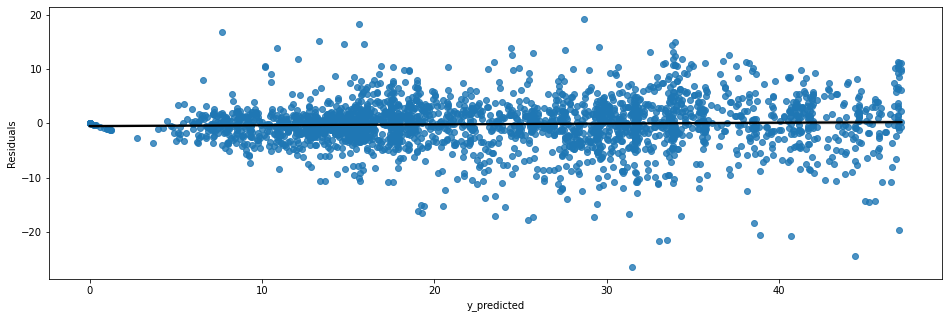

In [166]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

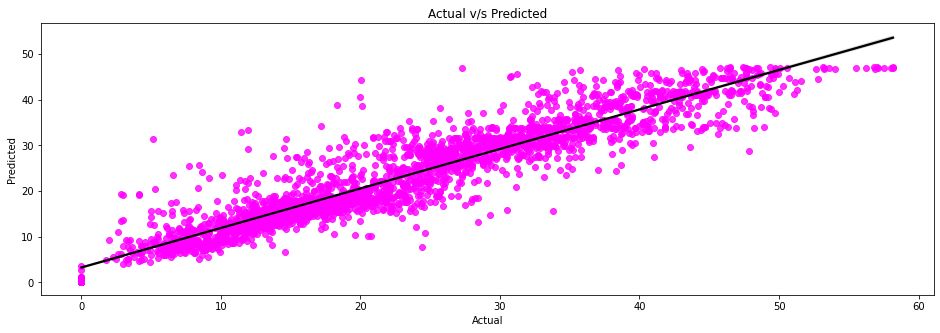

In [167]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


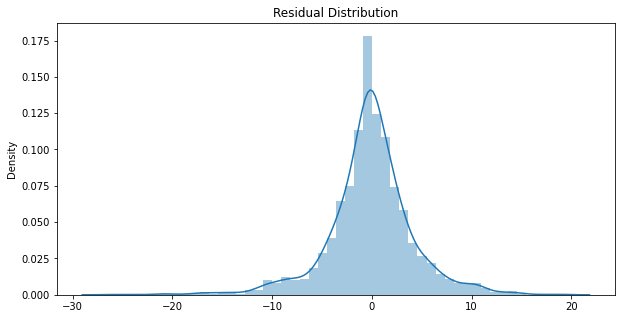

In [168]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

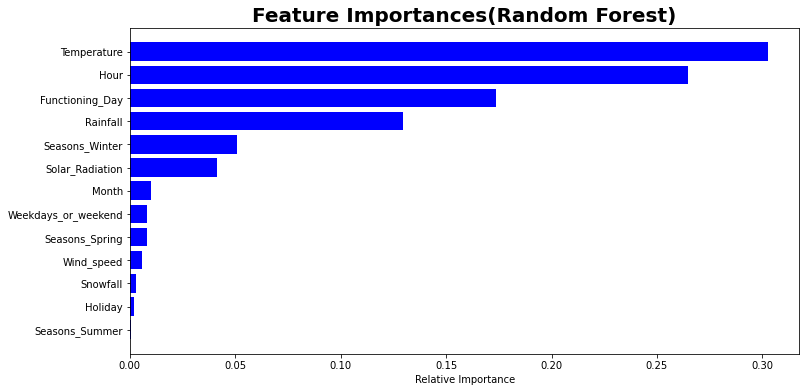

In [169]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)',fontweight="bold",fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

By looking at the graph we can say that temperature and hours plays very important role on bike rentals.

**Gradient Boosting Regressor**

In [170]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [171]:
gradboo_reg.score(X_train,y_train)

0.86803340650971

In [172]:
gradboo_reg.score(X_test,y_test)

0.8588926487697877

In [173]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [174]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 3.1772012244215926.
The Mean Squred Error(MSE) is 20.527734615794035.
The Root Mean Squared Error(RMSE) is 4.530754309802512.
The R2 Score is 0.86803340650971.


In [175]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.2824769429753164.
 The Mean Squred Error(MSE) is 21.67381904453655.
The Root Mean Squared Error(RMSE) is 4.6555149064884915.
The R2 Score is 0.8588926487697877.


In [176]:
test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4011  24.9629  4.9963    0.8375
5                           Radom forest  2.4884  14.2488  3.7748    0.9072
6             Random Forest-GridSearchCv  2.9617  18.7715  4.3326    0.8778
7           Gradient Boosting Regression  3.2825  21.6738  4.6555    0.8589

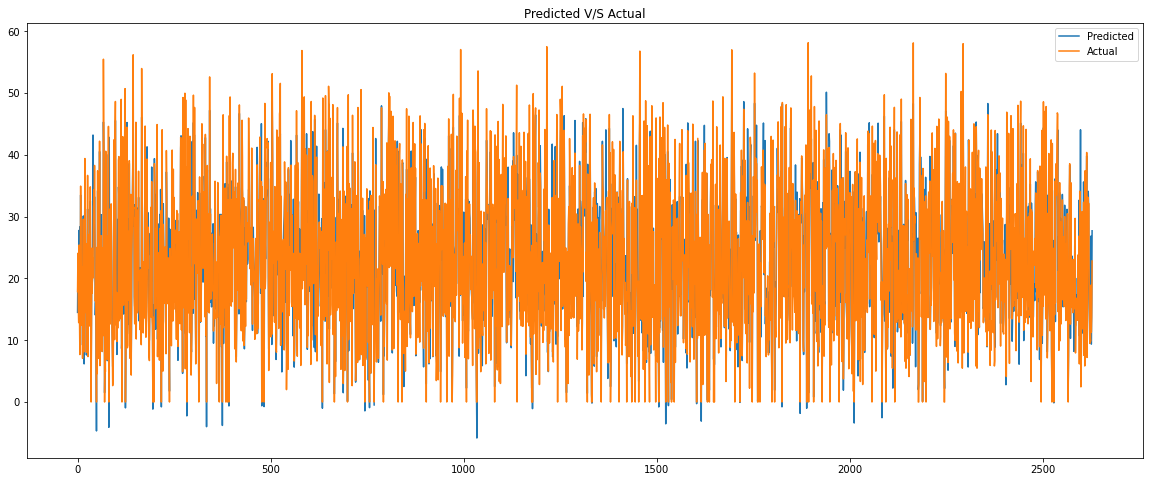

In [177]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

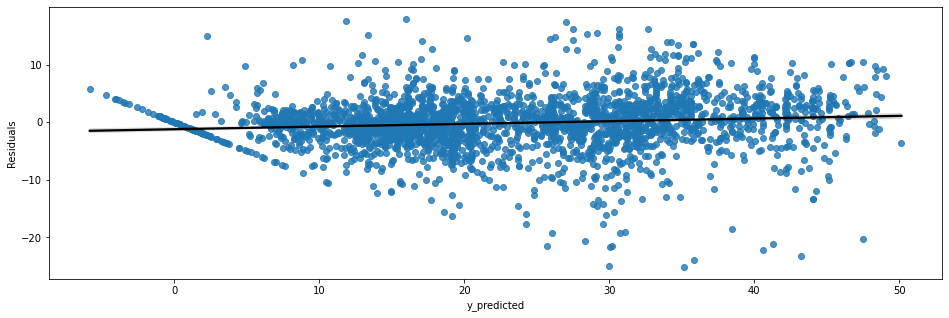

In [178]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')
     

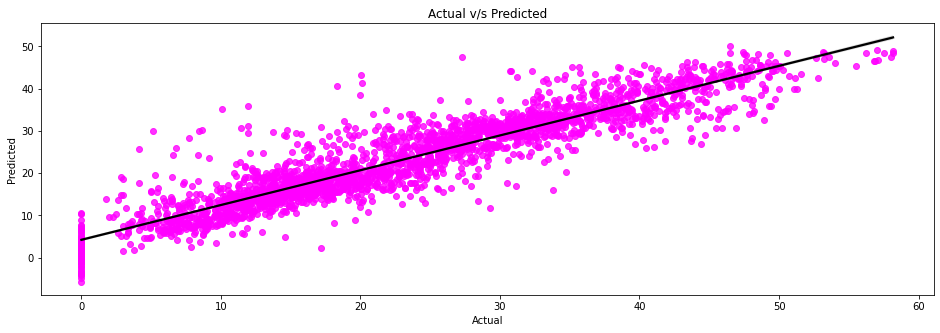

In [179]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


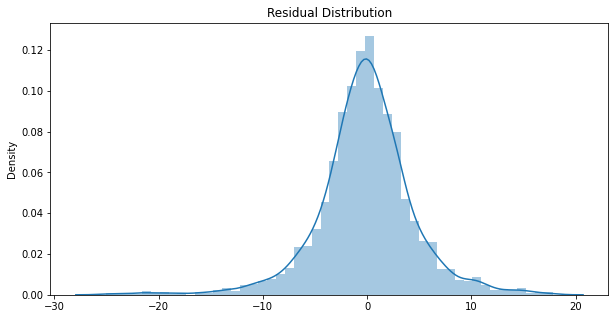

In [180]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

**GridSearchCV on Gradient Boosting Regressor**

In [181]:
gbr=GradientBoostingRegressor()

In [182]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }

In [183]:

#Gridsearch
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [187]:

# get best paramters to use
grad_boo_tuning.best_params_

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}

In [188]:

# USing best paramters tunned by GridsearchCv 
gradboo_tuned=GradientBoostingRegressor(learning_rate=0.04,max_depth=8,n_estimators=150,subsample=0.9)
gradboo_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=150,
                          subsample=0.9)

In [189]:

# checking score on train data
gradboo_tuned.score(X_train,y_train)

0.968389026116818

In [190]:
#checking score on test data
gradboo_tuned.score(X_test,y_test)

0.911963461719264

In [191]:

# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train=gradboo_tuned.predict(X_train)
# y predictions on test data
y_pred=gradboo_tuned.predict(X_test)
     

In [192]:

# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)

The Mean Absolute Error (MAE) is 1.5261734585372244.
The Mean Squred Error(MSE) is 4.917166274118475.
The Root Mean Squared Error(RMSE) is 2.2174684381335568.


In [193]:
train_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8555  60.2995  7.7653   
1                                       Lasoo  5.8691  60.4640  7.7759   
2                          Ridge GridSearchCV  5.8691  60.4640  7.7759   
3             ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040   
4        Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947   
5                               Random Forest  0.9407   2.1809  1.4768   
6                  Random Forest-GridSearchCv  2.6342  14.9559  3.8673   
7  Gradient Boosting Regression(GridSearchCV)  1.5262   4.9172  2.2175   

   R2_score  
0    0.6124  
1    0.6113  
2    0.6113  
3    0.6085  
4    0.8814  
5    0.9860  
6    0.9039  
7    0.9684

In [194]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")
     

 The Mean Absolute Error (MAE) is 2.3907750923975057.
 The Mean Squred Error(MSE) is 13.522243762418162.
The Root Mean Squared Error(RMSE) is 3.6772603609777432.
The R2 Score is 0.911963461719264.


In [195]:

test_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8342  58.6242  7.6566   
1                                       Lasso  5.8506  58.7927  7.6676   
2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676   
3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001   
4       Decision Tree Regressor(GridsearchCV)  3.4011  24.9629  4.9963   
5                                Radom forest  2.4884  14.2488  3.7748   
6                  Random Forest-GridSearchCv  2.9617  18.7715  4.3326   
7                Gradient Boosting Regression  3.2825  21.6738  4.6555   
8  Gradient Boosting Regression(GridSearchCV)  2.3908  13.5222  3.6773   

   R2_score  
0    0.6183  
1    0.6172  
2    0.6172  
3    0.6140  
4    0.8375  
5    0.9072  
6    0.8778  
7    0.8589  
8    0.9120

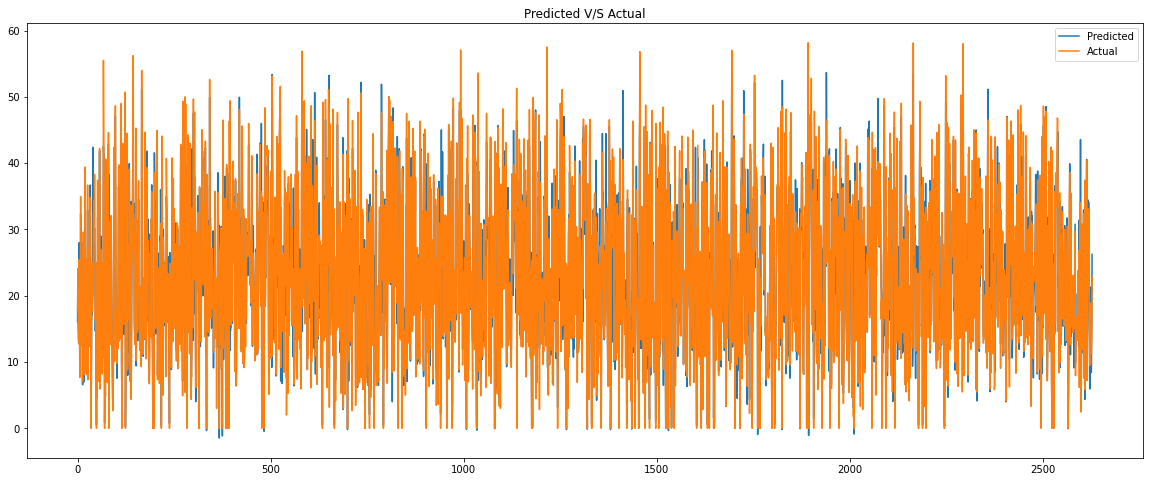

In [196]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

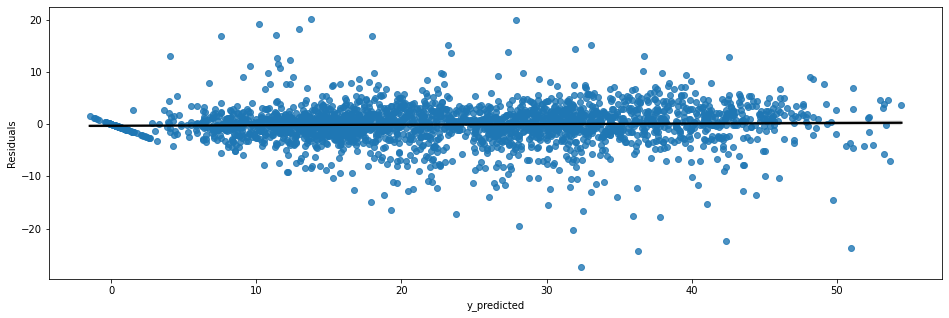

In [197]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

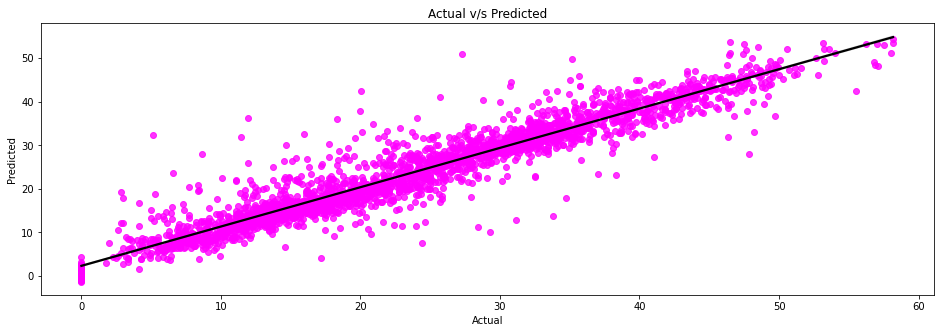

In [198]:

# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


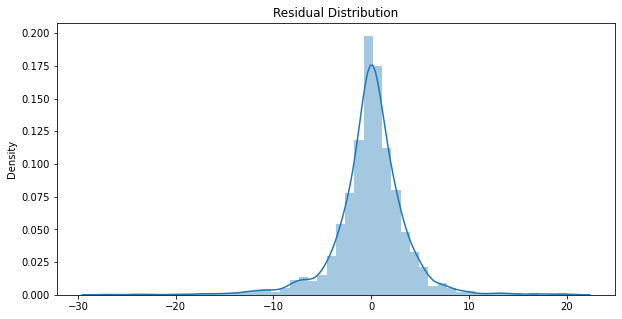

In [199]:

# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)


**Here we got very nice bell shaped curve of the residuals.**

Text(0.5, 0, 'Relative Importance')

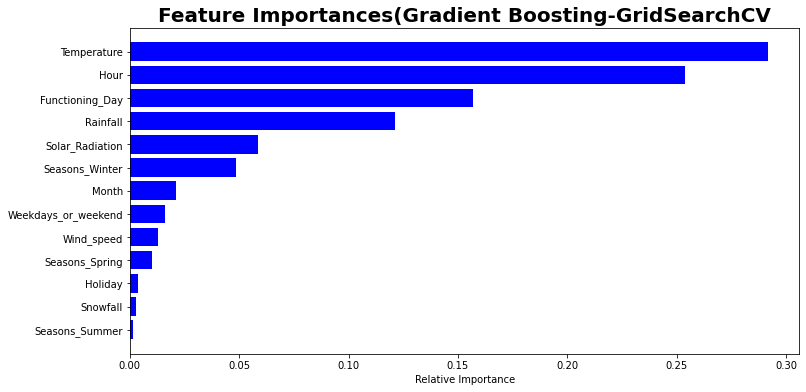

In [200]:
## Checking Feature imporatance
imp_variables=X.columns
importances = gradboo_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV',fontweight="bold",fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')
     

In [201]:
# Check Final table of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result

Model     MAE      MSE  \
Training set 0                           Linear Regression  5.8555  60.2995   
             1                                       Lasoo  5.8691  60.4640   
             2                          Ridge GridSearchCV  5.8691  60.4640   
             3             ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027   
             4        Decision Tree Regressor-GridSearchCV  2.8855  18.4446   
             5                               Random Forest  0.9407   2.1809   
             6                  Random Forest-GridSearchCv  2.6342  14.9559   
             7  Gradient Boosting Regression(GridSearchCV)  1.5262   4.9172   
Test set     0                           Linear Regression  5.8342  58.6242   
             1                                       Lasso  5.8506  58.7927   
             2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927   
             3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909   
             4       Decision Tree Regressor(GridsearchCV)  3.4011  24.9629   
             5                                Radom forest  2.4884  14.2488   
             6                  Random Forest-GridSearchCv  2.9617  18.7715   
             7                Gradient Boosting Regression  3.2825  21.6738   
             8  Gradient Boosting Regression(GridSearchCV)  2.3908  13.5222   

                  RMSE  R2_score  
Training set 0  7.7653    0.6124  
             1  7.7759    0.6113  
             2  7.7759    0.6113  
             3  7.8040    0.6085  
             4  4.2947    0.8814  
             5  1.4768    0.9860  
             6  3.8673    0.9039  
             7  2.2175    0.9684  
Test set     0  7.6566    0.6183  
             1  7.6676    0.6172  
             2  7.6676    0.6172  
             3  7.7001    0.6140  
             4  4.9963    0.8375  
             5  3.7748    0.9072  
             6  4.3326    0.8778  
             7  4.6555    0.8589  
             8  3.6773    0.9120

The overall conclusion is, The Gradient Boosting regression (Girdsearchcv) and Random Forest (Gridsearchvc) both model fitted with good R^2